In [1]:
from scipy.cluster.vq import kmeans
import pandas as pd
from scipy.cluster.vq import whiten
from matplotlib import pyplot as plt
from matplotlib import image as img

In [4]:
image = img.imread(r'C:/Users/neeli/Desktop/My picture/me.jpeg')

In [9]:
image

array([[[134, 117,  91],
        [134, 117,  91],
        [134, 117,  91],
        ...,
        [162, 146, 123],
        [162, 146, 123],
        [162, 146, 123]],

       [[135, 118,  92],
        [135, 118,  92],
        [135, 118,  92],
        ...,
        [162, 146, 123],
        [162, 146, 123],
        [162, 146, 123]],

       [[136, 118,  94],
        [136, 118,  94],
        [136, 118,  94],
        ...,
        [163, 147, 124],
        [162, 146, 123],
        [162, 146, 123]],

       ...,

       [[185, 142,  87],
        [184, 141,  86],
        [183, 140,  85],
        ...,
        [173, 123,  62],
        [173, 123,  62],
        [173, 123,  62]],

       [[184, 141,  86],
        [183, 140,  85],
        [181, 138,  83],
        ...,
        [173, 123,  62],
        [173, 123,  62],
        [173, 123,  62]],

       [[183, 141,  83],
        [182, 140,  82],
        [180, 138,  80],
        ...,
        [174, 124,  63],
        [174, 124,  63],
        [174, 124,  63]]

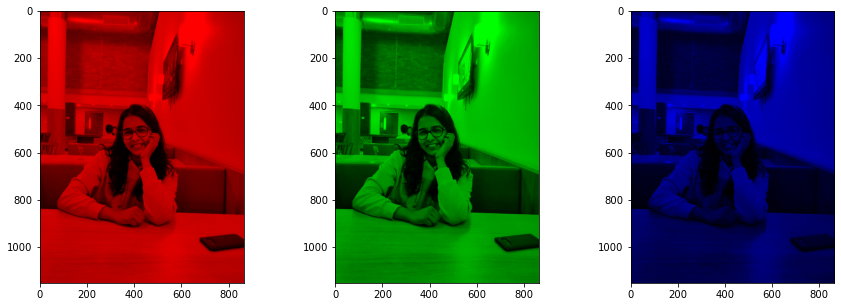

In [10]:
import numpy as np
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
    
    # initiate a zero matrix with dtype as unit8 as the R,G,B values are between 0 to 255
    channel = np.zeros(image.shape, dtype="uint8")
    
    # only allow one color at each time
    channel[:, :, c] = image[:, :, c]
    
    # display each channel
    ax.imshow(channel)

In [5]:
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())

In [6]:
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])

In [7]:
cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 5)

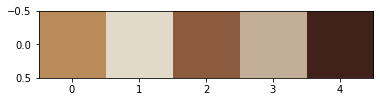

In [8]:
r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.show()